
# **Graded Notebook 2025**

#### **Dataset information**
We will use the **Health Insurance Costs** dataset (`insurance.csv`). Each row describes a person's demographic information (age, sex, BMI, number of children, region, smoker status) and the medical charges billed by an insurance company.

Download the dataset here: [insurance.csv](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv) and save it in the same directory as this notebook.

**Focus:** Scoring prioritizes how well you *interpret* and communicate the results (plots, coefficients, errors, and caveats). Raw accuracy is secondary. Use markdown cells to explain what the numbers mean in plain language.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
## **Task 1: Explore and prepare the data (15 points)**

#### **1.1: Load and inspect (5 points)**
- Load `insurance.csv` and display the head, shape, and data types.
- Identify the meaning of each column and which are categorical vs. numerical, note any immediate quirks you observe (e.g., units, obvious outliers).
- Which column is likely to be your target? Why?


In [3]:
# Task 1.1
insurance_frame = pd.DataFrame(pd.read_csv("insurance.csv"))

print("===> dataset first 5 rows <===\n")
print(insurance_frame.head())

print("\n===> dataset shape <===\n")
print(insurance_frame.shape)

print("\n===> dataset data types <===\n")
print(insurance_frame.dtypes)

print("\n===> dataset description <===\n")
print(insurance_frame.describe())

print("\n==> dataset unique values (by column) <===\n")
print(insurance_frame.nunique())

===> dataset first 5 rows <===

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

===> dataset shape <===

(1338, 7)

===> dataset data types <===

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

===> dataset description <===

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     

# Observations
Categorical columns:
- sex (2 values)
- smoker (2 values)
- region (4 values)

Numerical columns:
- age (lowest is 18, highest 64. Average age is ~39, most people between 25 - 53)
- bmi (lowest is 15,96 (underweight), highest 53,13 (severely obese). Average BMI is 30,66, most people between 24,56 - 36,76)
- children (lowest count is 0, highest is 5. Average count is 1 child / person, most have between 0 - 2)
- charges (lowest charges are 1121,87, highest are 63770,43 (very large range). Average charges are 13270,42, most people have between 0 - 37,490)

Actually, the STD range for charges is between -10,950 - 37,490. Due to there being a huge range in charges, it's causing the lower value to dip into the negative, but that doesn't make any sense in real life. From the numerical columns, charges is a clear outlier due to the large range in values.

From the categorical values region stands out as an outlier. It contains twice as many values as the other two, one for each intermediate direction. It may be worth analysing if different regions have different costs.

## Charges is the best candidate for a target
All the other values are more like predictors, and a prediction of a person's medical costs would be a useful prediction to make for insurance companies.



#### **1.2: Understand distributions and relationships (10 points)**
- Visualize distributions and explore relationships between the features and the target.
- Summarize 2–3 hypotheses about which factors likely drive costs and why.

We can see here that the average of charges varies by region!


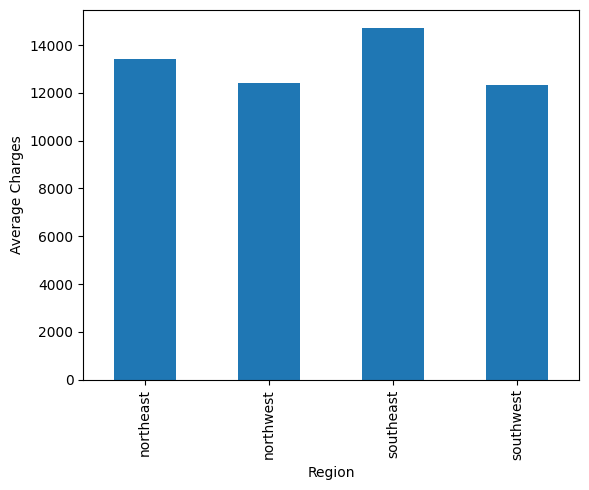

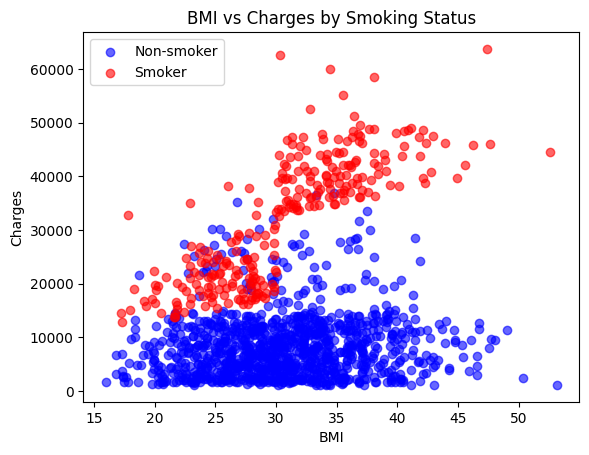

We can see from this plot that there's a clear correllation between higher charges, and a person being a smoker


In [21]:
# Task 1.2
print("We can see here that the average of charges varies by region!")
insurance_frame.groupby("region")["charges"].mean().plot(kind="bar")
plt.ylabel("Average Charges")
plt.xlabel("Region")
plt.show()

# Separate the data into smokers and non-smokers
smokers = insurance_frame[insurance_frame["smoker"] == "yes"]
non_smokers = insurance_frame[insurance_frame["smoker"] == "no"]

# Plot each group with different colors
plt.scatter(non_smokers["bmi"], non_smokers["charges"], 
            alpha=0.6, label="Non-smoker", color="blue")
plt.scatter(smokers["bmi"], smokers["charges"], 
            alpha=0.6, label="Smoker", color="red")

plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges by Smoking Status")
plt.legend()
plt.show()

print("We can see from this plot that there's a clear correllation between higher charges, and a person being a smoker")


---
## **Task 2: Regression – Predict medical charges (30 points)**

#### **2.1: Baseline linear models (15 points)**
- Using the features of your choice (likely linked to your hypothesis above), build a linear regression model to predict your target. Be mindful about the encoding of categorical values.
- Evaluate with at least two metrics and interpret their individual meaning.
- Interpret the sign and relative magnitude of coefficients linked to each feature in the model: what do they suggest about the link between each feature and the target?


In [ ]:
# Task 2.1



#### **2.2: Improving metrics (15 points)**
- Try improving your results, one can chose one or more of the following methods:
    - Adding or removing some features
    - Transforming some features (e.g. polynomials)
    - Using another regression algorithm
- Are your results better? Why?


In [ ]:
# Task 2.2



---
## **Task 3: Classification – Identify high-cost patients (30 points)**

#### **3.1: Define a binary outcome (5 points)**
- Create a `high_cost` label using a clear threshold on the charges column. Justify the cutoff and show the class balance.


In [ ]:
# Task 3.1


#### **3.2: Features analysis (10 points)**
- Similar to 1.2, explore the relationship between the features and this new target. What can you say?

In [ ]:
# Task 3.2



#### **3.3: Train and compare classifiers (15 points)**
- Train at least two different classifiers algorithms with sensible preprocessing.
- Evaluate the results with a set of classifiaction metrics, justify your choices and interpret their meaning.
- Interpret the types of mistakes each model makes and which features drive their decisions.


In [ ]:
# Task 3.3



---
## **Task 4: PCA (15 points)**
- Apply a PCA to reduce the number of features. 
- Carefully select the number of PC to use and document this choice.
- Train a model on these new features and iscuss how PCA affects model performances.

In [ ]:
# Task 4



---
## **Task 5: Unsupervised insights (10 points)**
- Apply clustering (e.g., K-Means) or another unsupervised method on selected features.
- Visualize and describe the discovered profiles: what characterizes each cluster?


In [21]:
# Task 5



---
## **Bonus: Anything more? (Optional)**
- If you feel like, implement anything that was not covered in this notebook (e.g. another model or task, cross validation, ...)

In [22]:
# Bonus Task
